### Домашнее задание по математической статистике
#### Лайко Рудольф, БПМ142

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

* Сгенерируем выборку $Y$ размером $n=$ 200 из генеральной совокупности с экспоненциальным распределением $Exp(\lambda)$
c параметром $\lambda = \dfrac{1}{2\theta  - 2}$, где $\theta = 1,5$

In [7]:
size = 200
tetta = 1.5
lambda0 = 1.0/(2*tetta - 2)

Y = np.random.exponential(lambda0, size)
pd.DataFrame(Y, columns=["Y"]).tail()


,Y
195,0.712657
196,0.657562
197,1.881287
198,0.013049
199,0.543869


In [ ]:
S = np.sqrt(sum((Y - Y.mean())**2)/size)
S

* выше мы вывели 5 последних элементов из выборки $Y$
* убедимся в ее корректности: выведем выборочное среднее, которое должно совпадать с параметром $\lambda=\dfrac{1}{2\theta-2} = 1$

In [3]:
print("Математическое ожидание Y:" ,Y.mean())
print("Лямбда: ", lambda0)

Математическое ожидание Y: 0.908487829304
Лямбда:  1.0


* далее построим эмпирическую функцию распределения, сравним ее с теоретической

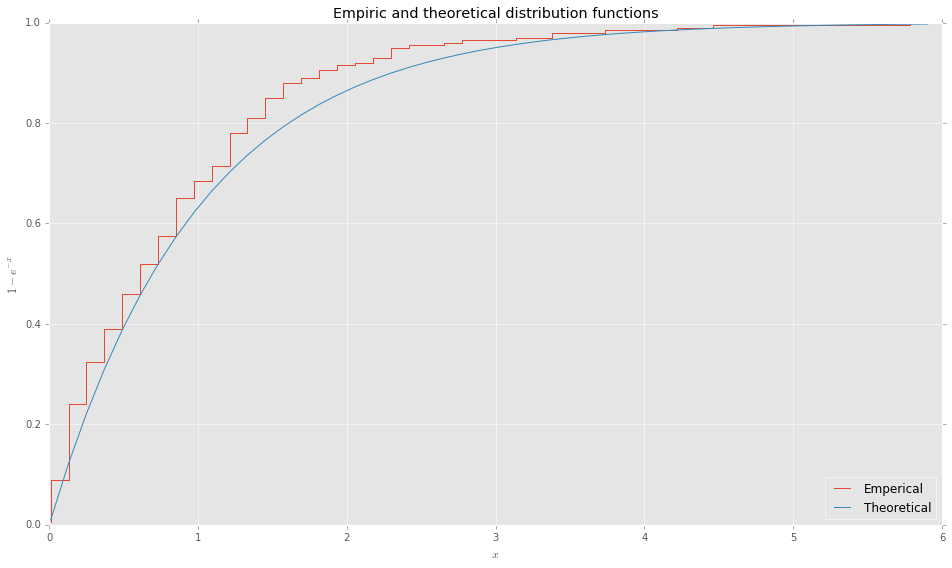

In [4]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(Y)

x = np.linspace(min(Y), max(Y))
y = ecdf(x)

plt.figure(figsize=(16,9))
plt.title("Empiric and theoretical distribution functions")
plt.step(x, y, label="Emperical")
plt.plot(x, 1-np.exp(-x), label="Theoretical")
plt.xlabel('$x$')
plt.ylabel('$1-e^{-x}$')
plt.legend(loc=4)

* построим гистограмму с $1-log_2(n)$ корзин, полигон частот
* на том же графике отобразим график плотности распределения, чтобы сравнить его с полигоном частот

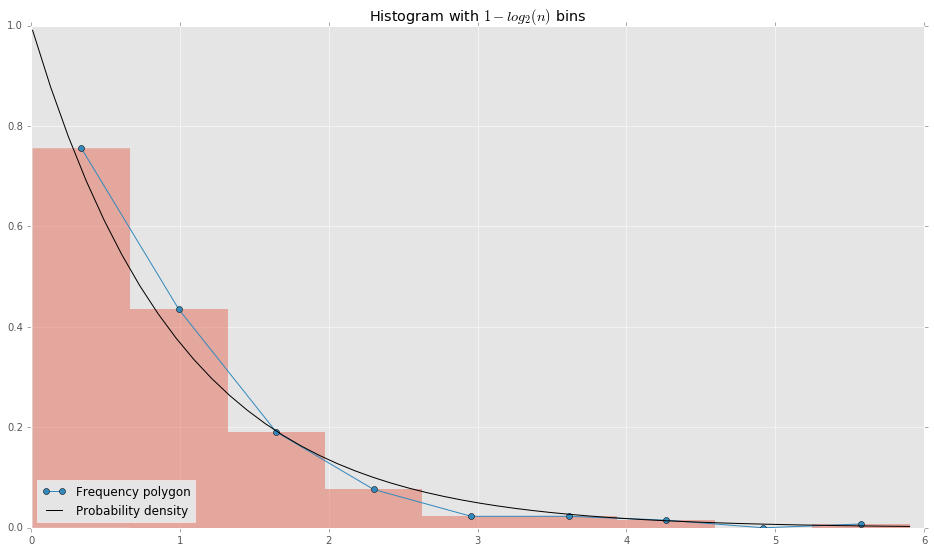

In [5]:
plt.figure(figsize=(16, 9))
(heights, edges, bars) = plt.hist(Y, normed=True, bins=int(round(1+np.log2(size))), lw=0,alpha=.4)
plt.plot(edges[:9] + (edges[1] - edges[0])/2, heights,'-o', label="Frequency polygon")
plt.title("Histogram with $1-log_2(n)$ bins")

plt.plot(x, np.exp(-x), label="Probability density", color='black')

plt.legend(loc=3)

Найдем доверительный интервал при $\alpha = 0.001$ и неизвестных мат.ожидания и дисперсии:

$I: \bar{Y} - t_{1-\frac{\alpha}{2}}\dfrac{S}{\sqrt[]{n}} < 2\theta - 2< \bar{Y} + t_{1 -\frac{\alpha}{2}}\dfrac{S}{\sqrt[]{n}}$

Стандартное отклонение  S:
$S = \sqrt[]{\dfrac{1}{n}\sum\limits_{i=1}^n (Y_i - \bar{Y})^2}$

$t_{1-\frac{\alpha}{2}} = 2,5758$ -  из таблицы квантилей стандартного нормального распределения

Посчитаем  S и сравним ее с $DY = \lambda^{-2} = (2\theta - 2)^2$

In [17]:
S = np.sqrt(sum((Y - Y.mean())**2)/size)
S

0.94122868837811802

In [20]:
DY = (2*tetta - 2)**2
DY

1.0

Выразим $\theta$ из неравенств интервала $I$ : 

$\dfrac{\bar{Y}}{2} - t_{1-\frac{\alpha}{2}}\dfrac{S}{2\sqrt[]{n}} + 1 < \theta < \dfrac{\bar{Y}}{2} + t_{1 -\frac{\alpha}{2}}\dfrac{S}{2\sqrt[]{n}} + 1$

In [25]:
t_st = 2.5758
I1 = Y.mean()/2 - t_st*S/(2*np.sqrt(size)) + 1
I2 = Y.mean()/2 + t_st*S/(2*np.sqrt(size)) + 1
print("Доверительный интервал: от {:f} до {:f}".format(I1, I2))

Доверительный интервал: от 1.434182 до 1.605614
